#Proyecto final de Inteligencia Artificial
Presentado por: Daniel Felipe Garzón

# Introducción
El siguiente informe tiene como fin aplicar un método de machine learning a un conjunto de datos con el motivo de analizarlo y poder realizar una predicción de este mismo. Se presentará la introducción, seguido de el desarrollo y resultados obtenidos.

Se utilizó un dataset sobre el rendimiento y caracteristicas de diferentes modelos de carro creados en 2014. El dataset cuenta con:
 el modelo del año, la marca 

*   Año del modelo
*   Marca manofacturera
*   Modelo
*   Clase del vehiculo
*   Tamaño del motor
*   Número de cilindros
*   Transmisión
*   Tipo de combustible
*   Combustible consumido en ciudad
*   Combustible consumido en autopista
*   Combustible consumido combinado
*   Combustible consumido combinado en Millas por galon
*   Emisión de Co2

Se planteó un problema supervisado de clasificación con el fin de saber que clase de vehiculo era, dependiendo de las otras características mencionadas anteriormente. Se utilizó un conjunto de entrenamiento y de prueba para poder realizar la validación por medio de F1 score y MCC score. De igual forma se utilizó grid search para poder optimizar los hiperparametros del método.

#Desarrollo y resultados
Para solucionar el problema de clasificación descrito en la introducción se decidió implementar KNN, y en el proceso aplicar métodos de optimización para obtener mejores reusltados como:
*   PCA
*   Normalización
*   Grid search
*   Validación del metodo por F1 y MCC

Inicialmente se importaron todas las librerias y funciones importantes para el desarrollo, entre las cuales se destacan, numpy, pandas, seaborn y varias funciones de sklearn. 






In [441]:
#Importe de librerías
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV

Seguido de esto se realizó la lectura del dataset escogido, se realizó una visualización de los 5 primeros datos para comprobar que todo en el dataset se encuentre en orden. Luego se comprobó que el dataset no tenga datos nulos, al comprobar que no hay datos nulos no se debe realizar ninguna modificación sobre este.

In [442]:
#lectura del dataset y visualización de los datos
ds=pd.read_csv('FuelConsumptionCO2.csv', sep=';')
ds.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [443]:
#Verificar el numero de nulos que tiene el dataset
ds.isnull().sum().sum()

0

Para tener una idea mas completa acerca del dataset se utilizó la funcion "describe()", el fin de esto era observar que todas las caracteristicas tuvieran el mismo numero de datos (se comprueba en la fila "count") y tener datos como la media, el maximo, mínimo y demás. Adicional se utilizó la función sns.pairplot() para observar las gráficas entre las caracteristicas y el tipo de clasificación.

In [444]:
#Se obtiene una descripción de los datos
ds.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

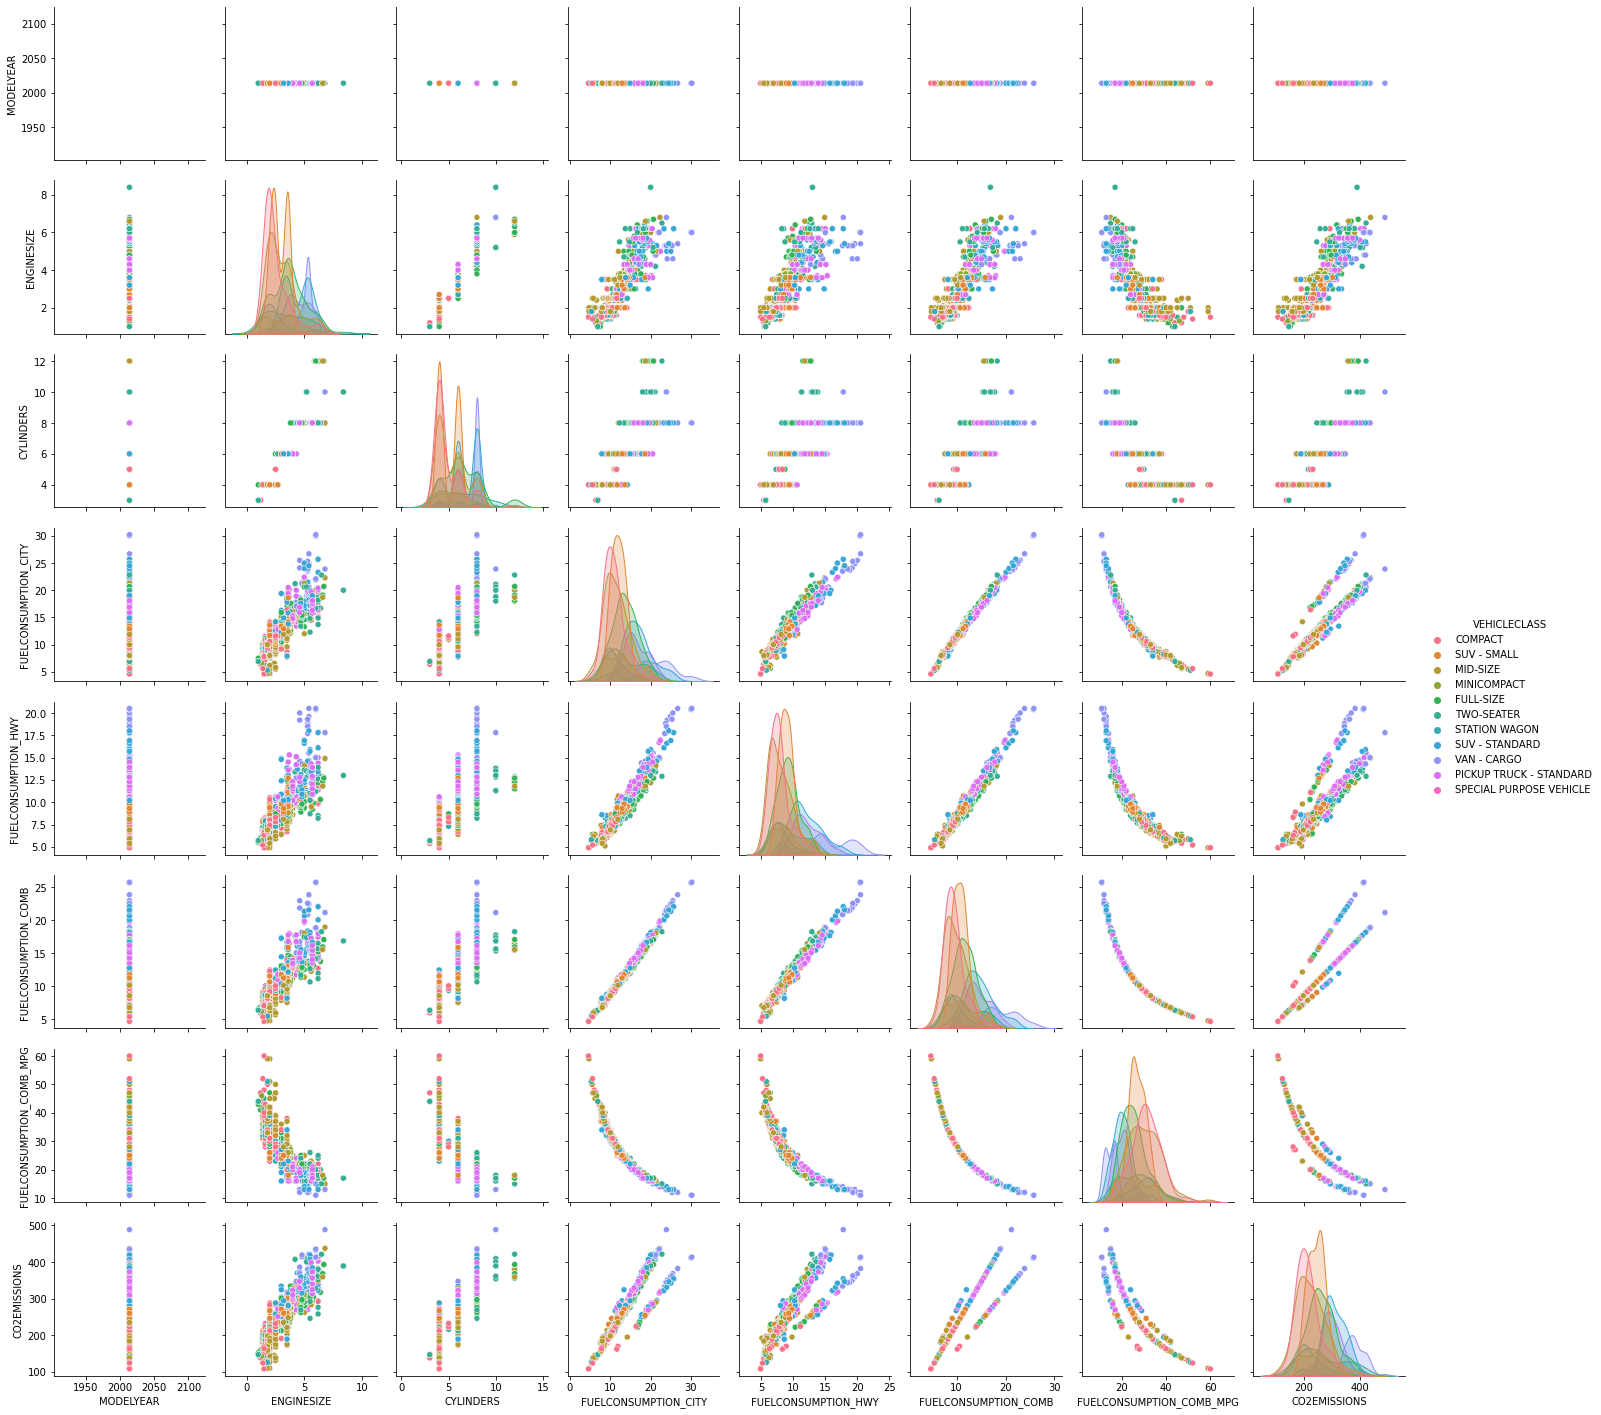

In [247]:
#Se visualizan las diferentes gráficas que hay con las diferentes clases de vehiculos
sns.pairplot(ds,hue='VEHICLECLASS')

Se utilizó la función train_test_split con el fin de crear conjuntos de pentrenamiento y de prueba, para la validación del método que se estpa implementando.

In [464]:
#Se hacen conjuntos de prueba y entrenamiento
X = ds[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']].values
y = ds['VEHICLECLASS'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=171217)



Seguido de esto se implmentaron 2 tipos de normalización, con el fin de determinar cual era el mejor para el conjunto de datos. Primero se utilizó StandardScaler y luego MinMaxScaler. Se obtuvo que MinMaxScaler fue más efectivo, se obtuvieron mejores resultados, en decir puntajes de desempeño mejores que utilizando StandardScaler.

In [457]:
#Normalización mediante StandarScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

[[ 1.59682623  0.03471606 -1.44988515]
 [-0.89226758  0.48351668 -0.16564378]
 [ 1.73965738  0.45249312 -1.88301223]
 ...
 [-1.03409284  0.08931791  0.07402713]
 [ 2.35863473  3.11895772  1.88563517]
 [-0.15051624 -0.78928113  0.24861324]]


In [465]:
#Normalización mediante MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
print(X_train)

[[0.63513514 0.55555556 0.5546875  0.55769231 0.55924171 0.71578947]
 [0.13513514 0.11111111 0.203125   0.19871795 0.20379147 0.26052632]
 [0.62162162 0.55555556 0.58984375 0.6025641  0.5971564  0.76315789]
 ...
 [0.13513514 0.11111111 0.19921875 0.12179487 0.17535545 0.22368421]
 [0.58108108 0.55555556 0.80859375 0.92307692 0.84834123 0.66842105]
 [0.35135135 0.33333333 0.30859375 0.20512821 0.27488152 0.35263158]]


Más adelante se implemento el método PCA, para poder obtener el número de caracteristicas que se desean se halló la varianza de las 6 caracteristicas, con lo cual se halló que hay 3 que son significativas para el dataset analizado. Se alicó PCA para 3 componentes y se obtuvo que el primer componente cuenta con el 89% de la varianza, el segundo el 8% y el tercer componente con cerca del 2%.

In [467]:
#PCA
pca = PCA(n_components=6)
X_t=pca.fit_transform(X)
print(pca.explained_variance_ratio_)
pca = PCA(n_components=3)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
print(pca.explained_variance_ratio_)

[9.97767424e-01 1.81528062e-03 3.05152179e-04 7.59309913e-05
 3.60780424e-05 1.34183694e-07]
[0.89613958 0.08609082 0.0177696 ]


Al tener una reducción considerable de las caracteristicas y haber normalizado nuestros datos se procedió a implementar el método de clasificación seleccionado para solucionar el problema. Se obtuvo que con un numero de vecinos igual a 18, peso minkowski, metrica de distancia y algoritmo de ball_tree se obtenian los mejores resultados (más adelante se explica como se obtuvo esto). Se utilizaron 3 métodos de validación, el primero que se utilizó fue el accuracy, luego una matriz de confusión con la cual se obtuvo el f1 score y finalmente el coeficiente de Matthews. Como se observa en todos los métodos de validación se obtuvieron resultados similares, el accuracy fue de 0.50, el F1 obtuvo errores de entre 0 y 1, esto debido a que habían datos que no tenian el suficiente soporte para poder ser una muestra representativa en las características y el coeficiente de Matthews arrojó un resultado de 0.4255. 

In [468]:
#Aplicación de KNN
n_neighbors = 18
distance='minkowski'
knn = KNeighborsClassifier(n_neighbors,weights='distance',metric=distance, metric_params=None,algorithm='ball_tree')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=18, weights='distance')

In [469]:
#Accuracy del método
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.50


In [470]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[16  5 12  0  0  0  1  2  1  0  0]
 [ 4 16 11  0  0  0  1  6  5  1  0]
 [13  5 21  0  0  0  0  8  1  1  0]
 [ 1  3  0  5  0  0  0  2  0  0  0]
 [ 0  0  0  0  8  0  0  4  2  0  0]
 [ 1  0  0  0  0  0  0  1  0  0  0]
 [ 9  0  3  0  0  0  2  4  0  0  0]
 [ 4  1  1  0  0  0  0 28  2  0  0]
 [ 0  0  0  1  1  0  0  2 21  1  3]
 [ 4  4  2  0  0  0  0  1  0  3  0]
 [ 0  0  0  0  0  0  0  0  0  0 13]]
                         precision    recall  f1-score   support

                COMPACT       0.31      0.43      0.36        37
              FULL-SIZE       0.47      0.36      0.41        44
               MID-SIZE       0.42      0.43      0.42        49
            MINICOMPACT       0.83      0.45      0.59        11
PICKUP TRUCK - STANDARD       0.89      0.57      0.70        14
SPECIAL PURPOSE VEHICLE       0.00      0.00      0.00         2
          STATION WAGON       0.50      0.11      0.18        18
            SUV - SMALL       0.48      0.78      0.60        36
         SUV - ST

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [471]:
matthews_corrcoef(y_test,pred)

0.4255119862179735

A continuación se observa el proceso de grid search, cuyo fin fue optimizar los hiperparametros del clasificador escogido. Los parametros que se iteraron varias veces fueron el numero de vecinos cercanos, el algoritmo, la métrica y el peso. Se aplicó la función GridSearchCV() y se realizó una lista con cada uno de los hiperparametros que se deseaba iterar. Finalmente se obtuvieron los resultados anteriormente explicados (en la aplicación del método), una ventaja de este método es que al tiempo que realiza la iteración de parametros obtiene una validación por medio de Cross validación de 5 pliegues, lo cual ayuda a obtener otro valor de score.

In [473]:
k=list(range(1,25))
w=['uniform','distance']
algor=['auto' , 'ball_tree' , 'kd_tree' , 'brute']
met=['minkowski','cityblock','manhattan','euclidean','l1','l2']
param_grid={
    'n_neighbors':k,
    'weights':w,
    'algorithm':algor,
    'metric': met
}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
{'algorithm': 'ball_tree', 'metric': 'minkowski', 'n_neighbors': 18, 'weights': 'distance'}
0.48875


#Conclusiones
*   Se concluye que el método de KNN no es altamente efectivo en este caso de análisis, se esperaba tener un mayor puntaje. Sin embargo se considera un método muy efectivo debido a que no requiere de un alto procesamiento computacional, por ende, se requiere un menor tiempo de procesamiento y analisis de datos.
*   El método de grid search implementado mediante sus funciones es muy efectivo, ya que además de permitir iterar varios hiperparametros al tiempo, cuenta con funciones que explican los resultados, en este caso se utilizó cross validación. Se considera que es un proceso que en todos los casos se debe realizar.
*   Otro método indispensable en el análisis y procesamiento de datos es PCA, debido a que ayuda a disminuir considerablemente el analisis de caracteristicas que probablemente no sean relevantes. En este caso se tenía un total de 6 caracteristicas y el método ayudó a disminuirlo a 3 y aún así tener el 99% de varianza en estas caracteristicas con respecto a las clases.
